# 6. Exploring Advanced Features

This notebook is target at advanced users that want, among other things, access MOA objects directly using the Python API from capymoa. 

* Examples on how to use any MOA Classifier or Regressor from capymoa
* An example of how preprocessing (from MOA) can be used.
* Comparing a SKLearn model against a MOA model
* A variation of **Tutorial 5**: `Creating a new classifier in CapyMOA` which uses MOA learners, thus accessing MOA (Java) objects directly
* How to log experiments using TensorBoard alongside the PyTorch API. This extends **Tutorial 3**: `Using Pytorch with CapyMOA`
* Creating a synthetic stream with concept drifts using the MOA CLI directly

---

*More information about CapyMOA can be found in* https://www.capymoa.org

**last update on 03/05/2024**

## 1. Using any MOA learner

* **CapyMOA gives you access to any MOA classifier or regressor**

* For some of the MOA learners there are corresponding Python objects (such as the HoeffdingTree or Adaptive Random Forest Classifier). However, MOA has over a hundred learners, and more are added constantly.

* To allow advanced users to access **any** MOA learner from CapyMOA, we included the ```MOAClassifier``` and ```MOARegressor``` generic wrappers.

In [1]:
from capymoa.evaluation import prequential_evaluation
from capymoa.base import MOAClassifier
from capymoa.datasets import RBFm_100k
# This is an import from MOA
from moa.classifiers.trees import HoeffdingAdaptiveTree

rbf_100k = RBFm_100k()

# Creates a wrapper around the HoeffdingAdaptiveTree, which then can be used as any other capymoa classifier
HAT = MOAClassifier(schema=rbf_100k.get_schema(), moa_learner=HoeffdingAdaptiveTree)

results_HAT = prequential_evaluation(stream=rbf_100k, learner=HAT, window_size=4500, max_instances=50000)

print(f"Cumulative accuracy = {results_HAT['cumulative'].accuracy()}, wall-clock time: {results_HAT['wallclock']}")
display(results_HAT['windowed'].metrics_per_window())

100% [..........................................................................] 9037474 / 9037474Cumulative accuracy = 59.57599999999999, wall-clock time: 1.4610631465911865


,classified instances,classifications correct (percent),Kappa Statistic (percent),Kappa Temporal Statistic (percent),Kappa M Statistic (percent),F1 Score (percent),F1 Score for class 0 (percent),F1 Score for class 1 (percent),F1 Score for class 2 (percent),F1 Score for class 3 (percent),...,Precision for class 1 (percent),Precision for class 2 (percent),Precision for class 3 (percent),Precision for class 4 (percent),Recall (percent),Recall for class 0 (percent),Recall for class 1 (percent),Recall for class 2 (percent),Recall for class 3 (percent),Recall for class 4 (percent)
0,4500.0,50.000000,33.449507,34.858135,27.768860,45.089567,53.487412,33.012821,62.374245,13.945578,...,39.845261,67.685590,29.496403,47.644540,43.338015,57.142857,28.180575,57.835821,9.131403,64.399421
1,9000.0,49.466667,32.401117,35.287422,28.332808,41.328952,56.127745,25.129983,61.844725,2.307692,...,34.855769,68.228404,6.185567,45.596376,41.013784,59.175084,19.647696,56.553398,1.418440,68.274303
2,13500.0,52.422222,36.245962,38.846044,32.031746,45.928811,59.177456,25.333333,53.851590,18.657938,...,39.820359,65.017065,31.318681,51.899384,43.756287,66.071429,18.575419,45.958987,13.286713,74.888889
3,18000.0,59.311111,46.626403,47.309353,41.632133,57.974404,59.917012,34.180139,58.620690,64.179104,...,44.223108,56.342857,75.704225,64.530457,56.441207,62.946818,27.854454,61.090458,55.699482,74.614820
4,22500.0,64.555556,54.112305,54.258675,48.943662,63.436739,67.889126,52.967359,60.546875,63.816475,...,62.962963,61.917443,57.954545,68.314763,63.573514,70.629991,45.710627,59.235669,70.997680,71.293605
5,27000.0,60.111111,48.455842,48.670289,44.375581,58.755137,68.893204,49.307075,58.830549,55.581395,...,58.885017,56.536697,54.566210,60.080321,58.558489,73.671096,42.409034,61.318408,56.635071,58.758837
6,31500.0,60.666667,48.797681,49.225473,44.058154,59.622479,69.438669,47.246608,56.351039,61.557478,...,56.813820,52.928416,66.223404,58.839590,58.587577,70.227082,40.437158,60.246914,57.505774,64.520958
7,36000.0,62.488889,51.365841,51.977240,46.666667,62.079191,67.826087,55.932203,53.044496,67.179487,...,61.682243,50.727884,67.007673,65.527489,61.832537,68.997473,51.162791,55.582822,67.352185,66.067416
8,40500.0,57.933333,45.320224,45.852403,39.559387,56.433686,65.095729,35.967742,56.277603,61.290323,...,43.984221,57.106274,59.507830,64.431725,56.395784,75.298126,30.422920,55.472637,63.182898,57.602339
9,45000.0,72.000000,63.510428,63.636364,59.420290,71.308445,71.458075,66.176471,72.941176,69.961977,...,70.977918,71.480583,75.000000,74.647887,70.422343,74.121680,61.983471,74.462705,65.558195,75.985663


### 1.1 Checking the hyperparameters for the MOA CLI

* MOA objects can be parametrized using the MOA CLI (Command Line Interface)
* Sometimes you may not know the relevent parameters for ```moa_learner```,  ```moa_learner.CLI_help()``` presents all the hyperparameters available for the ```moa_learner``` object.

In [2]:
from moa.classifiers.meta import AdaptiveRandomForest

arf = MOAClassifier(schema=rbf_100k.get_schema(), moa_learner=AdaptiveRandomForest)

print(arf.CLI_help())

-l treeLearner (default: ARFHoeffdingTree -e 2000000 -g 50 -c 0.01)
Random Forest Tree.
-s ensembleSize (default: 100)
The number of trees.
-o mFeaturesMode (default: Percentage (M * (m / 100)))
Defines how m, defined by mFeaturesPerTreeSize, is interpreted. M represents the total number of features.
-m mFeaturesPerTreeSize (default: 60)
Number of features allowed considered for each split. Negative values corresponds to M - m
-a lambda (default: 6.0)
The lambda parameter for bagging.
-j numberOfJobs (default: 1)
Total number of concurrent jobs used for processing (-1 = as much as possible, 0 = do not use multithreading)
-x driftDetectionMethod (default: ADWINChangeDetector -a 1.0E-3)
Change detector for drifts and its parameters
-p warningDetectionMethod (default: ADWINChangeDetector -a 1.0E-2)
Change detector for warnings (start training bkg learner)
-w disableWeightedVote
Should use weighted voting?
-u disableDriftDetection
Should use drift detection? If disabled then bkg learner is

## 2. Using preprocessing from MOA (filters)

We are working on a more user friendly API for preprocessing, this example just show how one can do that using MOA filters from here

* Here we use ```NormalisationFilter``` filter from MOA to normalize instances in an online fashion.
* MOA filters syntax wraps the whole stream, so we are always composing commands like `Filter(Stream, 
* We obtain the MOA CLI from the rbf_100k stream, since it can be mapped to a MOA stream, it is possible to obtain that. Comment out the print statements if you would like to inspect the actual creation strings (perhaps to copy and paste that into MOA?)

In [3]:
from capymoa.stream import Stream
from capymoa.classifier import OnlineBagging
from capymoa.evaluation import prequential_evaluation
from moa.streams.filters import StandardisationFilter, NormalisationFilter
from moa.streams import FilteredStream

rbf_100k = RBFm_100k()

# print(f'MOA creation string for data: {rbf_100k.moa_stream.getCLICreationString(rbf_100k.moa_stream.__class__)}')

# Create a FilterStream and use the NormalisationFilter
rbf_stream_normalised = Stream(CLI=f"-s ({rbf_100k.moa_stream.getCLICreationString(rbf_100k.moa_stream.__class__)}) \
-f NormalisationFilter ", moa_stream=FilteredStream())

# print(f'MOA creation string for filtered version: {rbf_stream_normalised.moa_stream.getCLICreationString(rbf_stream_normalised.moa_stream.__class__)}')

ob_learner_norm = OnlineBagging(schema=rbf_stream_normalised.get_schema(), ensemble_size=5)
ob_learner = OnlineBagging(schema=rbf_100k.get_schema(), ensemble_size=5)

ob_results_norm = prequential_evaluation(stream=rbf_stream_normalised, learner=ob_learner_norm)
ob_results = prequential_evaluation(stream=rbf_100k, learner=ob_learner)


print(f"Accuracy with online normalization: {ob_results_norm['cumulative'].accuracy()}")
print(f"Accuracy without normalization: {ob_results['cumulative'].accuracy()}")

Accuracy with online normalization: 61.815
Accuracy without normalization: 60.357000000000006


## 3. Comparing a MOA and SKLearn models

* This simple example shows how it is simple to compare a MOA and a SKLearn regressors. 
* For the sake of this example, we are using the wrappers
* SKClassifier (and SKRegressor) are parametrized directly as part of the object initialization
* MOAClassifier (and MOARegressor) are parametrized through a CLI (a separate parameter)

100% [..............................................................................] 21381 / 21381

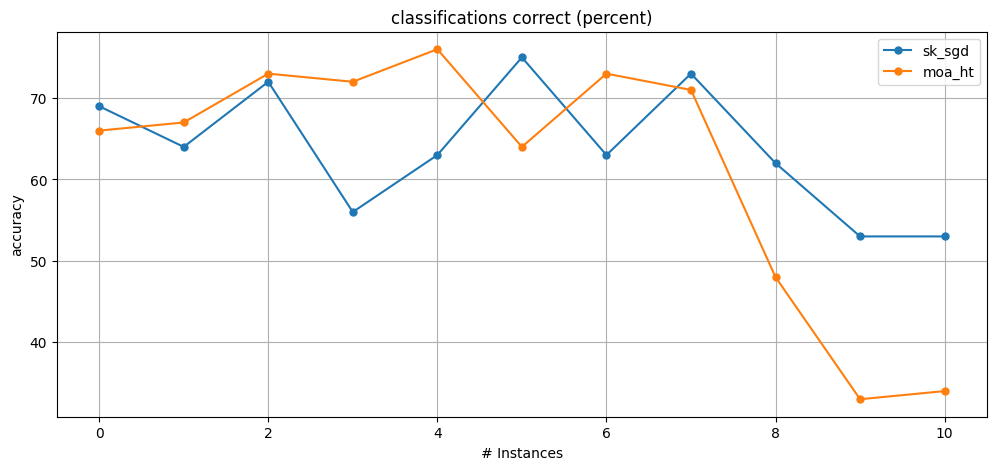

In [4]:
from capymoa.base import SKClassifier, MOAClassifier
from capymoa.datasets import CovtypeTiny
from capymoa.evaluation import prequential_evaluation_multiple_learners
from capymoa.evaluation.visualization import plot_windowed_results

from sklearn.linear_model import SGDClassifier
from moa.classifiers.trees import HoeffdingTree

covt_tiny = CovtypeTiny()

sk_sgd = SKClassifier(schema=covt_tiny.schema, sklearner=SGDClassifier(loss='log_loss', penalty='l1', alpha=0.001))
moa_ht = MOAClassifier(schema=covt_tiny.schema, moa_learner=HoeffdingTree, CLI="-g 50")

results = prequential_evaluation_multiple_learners(stream=covt_tiny, learners={'sk_sgd':sk_sgd, 'moa_ht':moa_ht}, window_size=100)
plot_windowed_results(results['sk_sgd'], results['moa_ht'], ylabel="accuracy")

## 4. Creating Python learners with MOA Objects

* This example follow the example from `06_new_learner` which shows how to create a custom online bagging implementation.
* Here we also create an online bagging implementation, but the base_learner is a MOA class

In [5]:
from capymoa.base import Classifier, MOAClassifier
from moa.classifiers.trees import HoeffdingTree
from collections import Counter
import numpy as np
import random
import math

def poisson(lambd, random_generator):
    if lambd < 100.0:
        product = 1.0
        _sum = 1.0
        threshold = random_generator.random() * math.exp(lambd)
        i = 1
        max_val = max(100, 10 * math.ceil(lambd))
        while i < max_val and _sum <= threshold:
            product *= (lambd / i)
            _sum += product
            i += 1
        return i - 1
    x = lambd + math.sqrt(lambd) * random_generator.gauss(0, 1)
    if x < 0.0:
        return 0
    return int(math.floor(x))

class CustomOnlineBagging(Classifier):
    def __init__(self, schema=None, random_seed=1, ensemble_size=5, moa_base_learner_class=None, CLI_base_learner=None):
        super().__init__(schema=schema, random_seed=random_seed)

        self.random_generator = random.Random()
        self.CLI_base_learner = CLI_base_learner
        
        self.ensemble_size = ensemble_size
        self.moa_base_learner_class = moa_base_learner_class
        
        # Default base learner if None is specified
        if self.moa_base_learner_class is None:
            self.moa_base_learner_class = HoeffdingTree
        
        self.ensemble = []
        # Create several instances for the base_learners
        for i in range(self.ensemble_size): 
            self.ensemble.append(MOAClassifier(schema=self.schema, moa_learner=self.moa_base_learner_class(), CLI=self.CLI_base_learner))
        
    def __str__(self):
        return 'CustomOnlineBagging'

    def train(self, instance):
        for i in range(self.ensemble_size):
            k = poisson(1.0, self.random_generator)
            for _ in range(k):
                self.ensemble[i].train(instance)

    def predict(self, instance):
        predictions = []
        for i in range(self.ensemble_size):
            predictions.append(self.ensemble[i].predict(instance))
        majority_vote = Counter(predictions)
        prediction = majority_vote.most_common(1)[0][0]
        return prediction

    def predict_proba(self, instance):
        probabilities = []
        for i in range(self.ensemble_size):
            classifier_proba = self.ensemble[i].predict_proba(instance)
            classifier_proba = classifier_proba / np.sum(classifier_proba)
            probabilities.append(classifier_proba)
        avg_proba = np.mean(probabilities, axis=0)
        return avg_proba



### 4.1 Testing the custom online bagging

* We choose to use an HoeffdingAdaptiveTree from MOA as the base learner
* We also specify the CLI commands to configure the base learner

In [6]:
from capymoa.evaluation import prequential_evaluation
from capymoa.stream import stream_from_file
from moa.classifiers.trees import HoeffdingAdaptiveTree

elec_stream = stream_from_file(path_to_csv_or_arff="../data/electricity.csv")

# Creating a learner: using a hoeffding adaptive tree as the base learner with grace period of 50 (-g 50)
NEW_OB = CustomOnlineBagging(schema=elec_stream.get_schema(), 
                             ensemble_size=5, 
                             moa_base_learner_class=HoeffdingAdaptiveTree, 
                             CLI_base_learner="-g 50")

results_NEW_OB = prequential_evaluation(stream=elec_stream, learner=NEW_OB, window_size=4500)

results_NEW_OB['cumulative'].accuracy()

82.81912076271186

## 5. Using TensorBoard with PyTorch in CapyMOA

* One can use TensorBoard to visualize logged data in an online fashion
* We go through all the steps below, including installing TensorBoard

### 5.1 Install TensorBoard
Clear any logs from previous runs

```sh
rm -rf ./runs
```

In [1]:
!pip install tensorboard

### 5.2  PyTorchClassifier
* We define `PyTorchClassifier` and `NeuralNetwork` classes similarly to those from **Tutorial 3**: `Using Pytorch with CapyMOA`

In [8]:
from capymoa.base import Classifier
import numpy as np
import torch
from torch import nn

torch.manual_seed(1)
torch.use_deterministic_algorithms(True)

# Get cpu device for training.
device = ("cpu")

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size=0, number_of_classes=0):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, number_of_classes)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits


class PyTorchClassifier(Classifier):
    def __init__(self, schema=None, random_seed=1, nn_model: nn.Module = None, optimizer=None, loss_fn=nn.CrossEntropyLoss(), device=("cpu"), lr=1e-3):
        super().__init__(schema, random_seed)
        self.model = None
        self.optimizer = None
        self.loss_fn = loss_fn
        self.lr = lr
        self.device = device
        
        torch.manual_seed(random_seed)
        
        if nn_model is None:
            self.set_model(None)
        else:
            self.model = nn_model.to(device)
        if optimizer is None:
            if self.model is not None:
                self.optimizer = torch.optim.SGD(self.model.parameters(), lr=lr)
        else:
            self.optimizer = optimizer
        
    def __str__(self):
        return str(self.model)

    def CLI_help(self):
        return str('schema=None, random_seed=1, nn_model: nn.Module = None, optimizer=None, loss_fn=nn.CrossEntropyLoss(), device=("cpu"), lr=1e-3')

    def set_model(self, instance):
        if self.schema is None:
            moa_instance = instance.java_instance.getData()
            self.model = NeuralNetwork(input_size=moa_instance.get_num_attributes(), number_of_classes=moa_instance.get_num_classes()).to(self.device)
        elif instance is not None:
            self.model = NeuralNetwork(input_size=self.schema.get_num_attributes(), number_of_classes=self.schema.get_num_classes()).to(self.device)
            
    def train(self, instance):
        if self.model is None:
            self.set_model(instance)
    
        X = torch.tensor(instance.x, dtype=torch.float32)
        y = torch.tensor(instance.y_index, dtype=torch.long)
        # set the device and add a dimension to the tensor
        X, y = torch.unsqueeze(X.to(self.device), 0), torch.unsqueeze(y.to(self.device),0)

        # Compute prediction error
        pred = self.model(X)
        loss = self.loss_fn(pred, y)
    
        # Backpropagation
        loss.backward()
        self.optimizer.step()
        self.optimizer.zero_grad()

    def predict(self, instance):
        return np.argmax(self.predict_proba(instance))

    def predict_proba(self, instance):
        if self.model is None:
            self.set_model(instance)
        X = torch.unsqueeze(torch.tensor(instance.x, dtype=torch.float32).to(self.device), 0)
        # turn off gradient collection
        with torch.no_grad():
            pred = np.asarray(self.model(X).numpy(), dtype=np.double)
        return pred


### 5.3  PyTorchClassifier + the test-then-train loop + TensorBoard
* Here we use instance loop to log relevant log information to TensorBoard
* These information can be viewed while the processing is happening using TensorBoard

In [9]:
from capymoa.evaluation import ClassificationEvaluator
from capymoa.datasets import RBFm_100k
from torch.utils.tensorboard import SummaryWriter

# Create a SummaryWriter instance.
writer = SummaryWriter()
## Opening a file again to start from the beginning
rbf_stream = RBFm_100k()

# Creating the evaluator
evaluator = ClassificationEvaluator(schema=rbf_stream.get_schema())

# Creating a learner
simple_pyTorch_classifier = PyTorchClassifier(
    schema=rbf_stream.get_schema(), 
    nn_model=NeuralNetwork(input_size=rbf_stream.get_schema().get_num_attributes(), 
                           number_of_classes=rbf_stream.get_schema().get_num_classes()).to(device)
)

i = 0
while rbf_stream.has_more_instances():
    i += 1
    instance = rbf_stream.next_instance()

    prediction = simple_pyTorch_classifier.predict(instance)
    evaluator.update(instance.y_index, prediction)
    simple_pyTorch_classifier.train(instance)
    
    if i % 1000 == 0:
        writer.add_scalar("accuracy", evaluator.accuracy(), i)

    if i % 10000 == 0:
        print(f"Processed {i} instances")

writer.add_scalar("accuracy", evaluator.accuracy(), i)
# Call flush() method to make sure that all pending events have been written to disk.
writer.flush()

# If you do not need the summary writer anymore, call close() method.
writer.close()

Processed 10000 instances
Processed 20000 instances
Processed 30000 instances
Processed 40000 instances
Processed 50000 instances
Processed 60000 instances
Processed 70000 instances
Processed 80000 instances
Processed 90000 instances
Processed 100000 instances


#### 5.4 Run TensorBoard
Now, start TensorBoard, specifying the root log directory you used above. 
Argument ``logdir`` points to directory where TensorBoard will look to find 
event files that it can display. TensorBoard will recursively walk 
the directory structure rooted at ``logdir``, looking for ``.*tfevents.*`` files.

```sh
tensorboard --logdir=runs
```
Go to the URL it provides

This dashboard shows how the accuracy change with time. 
You can use it to also track training speed, learning rate, and other 
scalar values.

## 6. Creating a synthetic stream with concept drifts from MOA

* Demonstrates the flexibility of the API, these level of manipulation of the API is expected from experienced MOA users.
* To use the API like this the user must be familiar with how concept drifts are simulatd in MOA

EvaluatePrequential -l trees.HoeffdingAdaptiveTree **-s (ConceptDriftStream -s generators.AgrawalGenerator -d (generators.AgrawalGenerator -f 2) -p 5000)** -e (WindowClassificationPerformanceEvaluator **-w 100**) **-i 10000 -f 100**

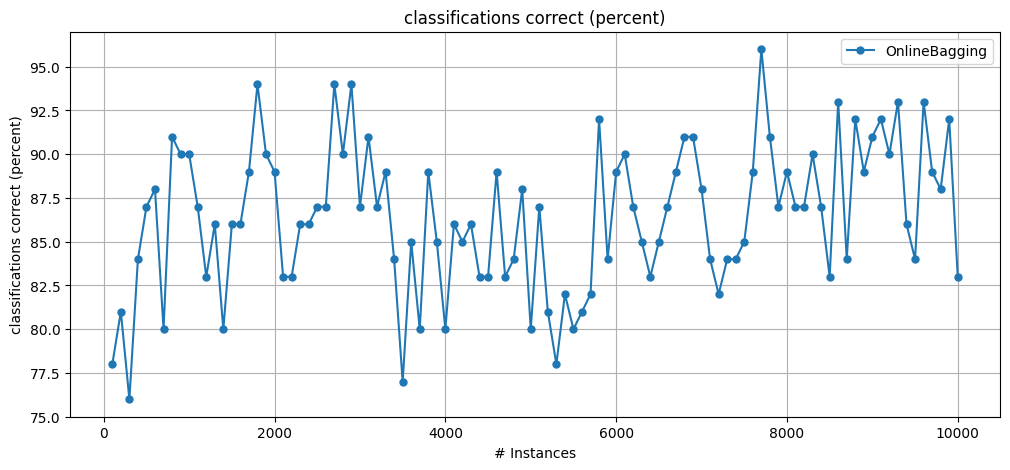

In [10]:
from capymoa.stream import Stream
from capymoa.classifier import OnlineBagging
from capymoa.evaluation import prequential_evaluation
from capymoa.evaluation.visualization import plot_windowed_results
from moa.streams import ConceptDriftStream

# Using the API to generate the data using the ConceptDriftStream and AgrawalGenerator.
# The drift location is based on the number of instances (5000) as well as the drift width (1000, the default value) 
stream_sea1drift = Stream(moa_stream=ConceptDriftStream(), 
                          CLI="-s generators.SEAGenerator -d (generators.SEAGenerator -f 2) -p 5000 -w 1000")

OB = OnlineBagging(schema=stream_sea1drift.get_schema(), ensemble_size=10)

results_sea1drift_OB = prequential_evaluation(stream=stream_sea1drift, learner=OB, window_size=100, max_instances=10000)

plot_windowed_results(results_sea1drift_OB)